In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_DIR = r"C:\Users\ASUS\Desktop\Machine Learning\Food classification\Indian Food Images\Indian Food Images"

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

print("Loading and preprocessing data...")

try:
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        DATA_DIR,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
    )
except FileNotFoundError:
    print(f"ERROR: The directory '{DATA_DIR}' was not found.")
    print("Please make sure you have updated the 'DATA_DIR' variable in the script with the correct path.")
    exit()

class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Found {num_classes} classes: {class_names[:5]}...")

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2),
])

train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

print("Building the model...")

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMAGE_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

inputs = tf.keras.Input(shape=IMAGE_SIZE + (3,))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model Summary:")
model.summary()

print(f"\nStarting training for {EPOCHS} epochs...")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)
print("Training finished.")

Loading and preprocessing data...
Found 4275 files belonging to 89 classes.
Using 3420 files for training.
Found 4275 files belonging to 89 classes.
Using 855 files for validation.
Found 89 classes: ['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch']...
Building the model...
Model Summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenet

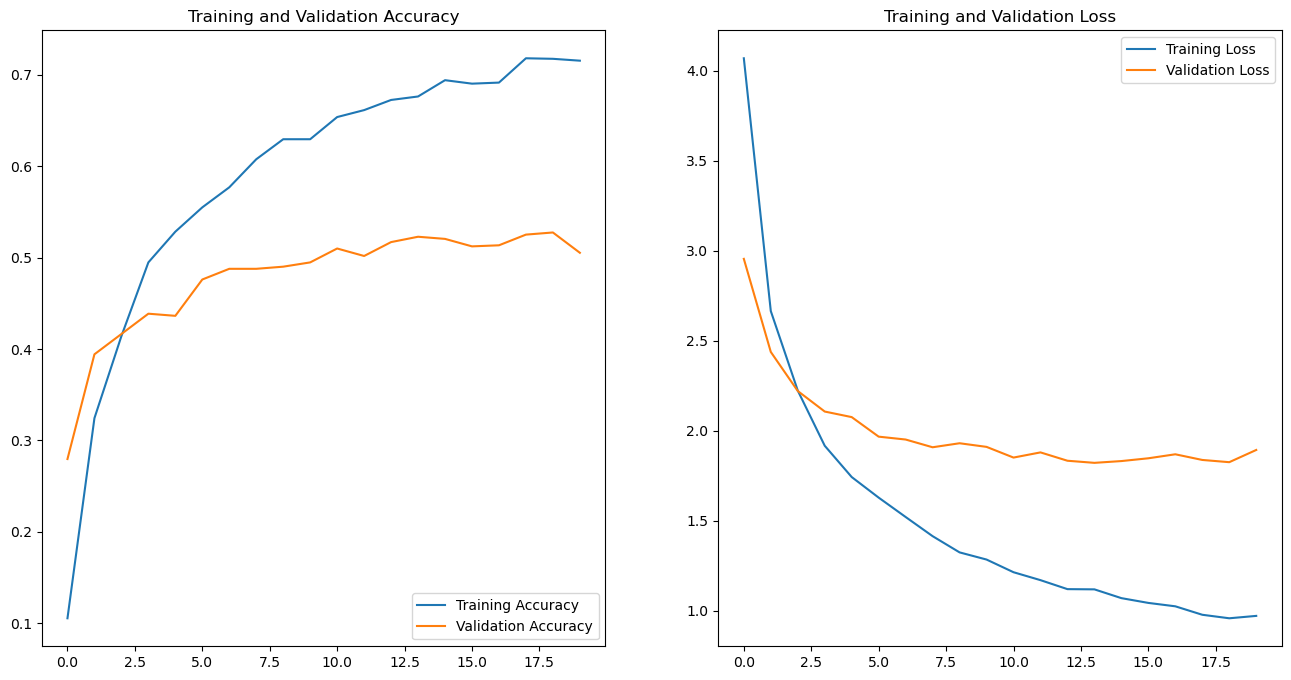

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)  

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("Saving the trained model...")
model.save("indian_food_classifier.h5")
print("Model saved successfully as indian_food_classifier.h5")

print("Saving class names...")
with open("class_names.txt", "w") as f:
    for name in class_names:
        f.write(f"{name}\n")
print("Class names saved to class_names.txt")

Saving the trained model...
Model saved successfully as indian_food_classifier.h5
Saving class names...
Class names saved to class_names.txt


c:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
